# Julia Foundations

> Computational Analysis of Social Complexity
>
> Fall 2024, Spencer Lyon

**Prerequisites**

- Laptop or personal computer with internet connection

**Outcomes**

- Understand the main benefits and features of Julia
- See how to define variables, functions, and types in Julia
- Install commonly used packages for Graphs, DataFrames, Plotting and more

**References**

- [Packages and Software Engineering](https://julia.quantecon.org/more_julia/index.html) section of QuantEcon julia lectures
- Julia [documentation](https://docs.julialang.org/en/v1/)
- Documentation for packages: [Graphs](https://juliagraphs.org/Graphs.jl/dev/), [DataFrames](https://dataframes.juliadata.org/stable/), [Plots](https://docs.juliaplots.org/stable/)

## What is Julia?

- Julia is a relatively new programming language (first public release in 2012, 1.0 release in 2018)
- General purpose, but specializes in numerical computation
- Leverages advanced compiler technology to generate very efficient code
- It can be as clear to read and write as Python, and as quick to evaluate as C!

In [1]:
function dumb_loop(n)
    out = 0
    for i in 1:n
        out += 1
    end
    return out
end

dumb_loop (generic function with 1 method)

In [7]:
using BenchmarkTools

In [9]:
@btime dumb_loop(100_000_000_0000000)

  1.291 ns (0 allocations: 0 bytes)


1000000000000000

In [13]:
@code_llvm dumb_loop(2100000)

;  @ In[1]:1 within `dumb_loop`
define i64 @julia_dumb_loop_1851(i64 signext %0) #0 {
top:
;  @ In[1]:3 within `dumb_loop`
  %1 = call i64 @llvm.smax.i64(i64 %0, i64 0)
;  @ In[1]:6 within `dumb_loop`
  ret i64 %1
}


## Core Types

- We'll start by learning about the core datatypes built in to Julia
- Along the way we'll pick up some of the key syntax elements
- We will move quickly, so some prior programming experience would be helpful

### Numbers

- Let's start with numbers
- To work with a number, just type it!

In [14]:
42

42

- We can also do basic arithmetic in the way you would expect

In [15]:
10 * 3

30

In [16]:
1 + 2

3

- So far we've worked with integers (whole numbers)
- Julia can also work with numbers containing a decimal
- In Julia these are called floating point numbers

In [19]:
1.234 ^ 2.2

1.5881567008330448

In [20]:
553.34 / 12.9

42.89457364341085

- We can mix and match integers and floats

In [21]:
25 / 2.5

10.0

In [22]:
25 / 2  # dividing integers returns a float (notice the `.`)

12.5

- notice we used `#` to define a comment

## Text Data

- Not all data is numerical
- Some is textual
- To represent text in Julia we use a `String`
- To define a String we use quotation marks (`"`) as below

In [23]:
"My name is Spencer"

"My name is Spencer"

In [24]:
"1"  # an integer in a string

"1"

- You cannot use single quotes for strings as in other languages (like Python or Javascript)
- Go ahead... try it by removing the `#` and excuting the cell below

In [27]:
# 'hello'

In [32]:
"""
This

is

also

a

string
"""

"This\n\nis\n\nalso\n\na\n\nstring\n"

## Arrays

- When doing numerical work, we often need to deal with multiple pieces of data at the same time
- In Julia the default way of doing this is to use an array
- Arrays are defined with `[` and `]` as below

In [36]:
[1, 2, 3.14]  # a 3 element array 

3-element Vector{Float64}:
 1.0
 2.0
 3.14

In [37]:
[1 2 3]  # a 1x3 matrix

1×3 Matrix{Int64}:
 1  2  3

In [39]:
[1 2; 3 4]  # a 2x2 matrix

2×2 Matrix{Int64}:
 1  2
 3  4

In [38]:
[1 2
 3 4]  # another way to write a 2x2 matrix

2×2 Matrix{Int64}:
 1  2
 3  4

In [40]:
[1 "hello"; 2 "world"]  # a 2x2 matrix with int and string

2×2 Matrix{Any}:
 1  "hello"
 2  "world"

### Accessing array items

- We can use `[N]` to access the Nth element
- We can also use `[i:j]` to access items `i` through `j`
- Finally we can use `[[n1, n2]]` to access the n1th and n2th elements

In [41]:
[100, 101, 102, 103][2]

101

In [42]:
[100, 101, 102, 103][2:4]

3-element Vector{Int64}:
 101
 102
 103

In [43]:
[100, 101, 102, 103][[1, 3]]

2-element Vector{Int64}:
 100
 102

- Note that unlike Python, Julia starts counting at 1

## Tuples

- There is another data type for holding "lists" of data called a tuple
- Tuples are create using parenthesis instead of square brackets as follows


In [48]:
(1, 2, 3, "hello")

(1, 2, 3, "hello")

In [49]:
("hello", 5)

("hello", 5)

In [50]:
("hello", 5)[2]

5

- The main differences between tuples and arrays are
    1. Tuples are meant to hold immutable or non-changing data
    2. Tuples aren't usually meant for computation or linear algebra
   

## Dictionary

- Very often in programming we want to be able to associate a key or name to a specific value
- One data type for doing that is a Dict
- Dicts are created with the somewhat inconvenient syntax `Dict(name => value, ...)` where the `...` means we can repeat the pattern multiple times
- They keys and values can be of any type

In [52]:
Dict("x" => 1, 2 => "y", ["w", "z"] => [1, 2, 3])

Dict{Any, Any} with 3 entries:
  2          => "y"
  ["w", "z"] => [1, 2, 3]
  "x"        => 1

In [55]:
# use `[name]` to acces element with `name`
Dict("x" => 1, 2 => "y", ["w", "z"] => [1, 2, 3])[2]

"y"

In [60]:
Dict("x" => 1, "y" =>2)

Dict{String, Int64} with 2 entries:
  "x" => 1
  "y" => 2

- Dictionaries are often used for passing around groups of parameters
- We'll see examples later on

## Named Tuples

- The final "collection" we'll talk about is the named tuple
- It is a hybrid between a tuple and a dictionary
- To create them we use the synax `(name = value, ...)`

- They names or keys need to be just names (not numbers or arrays). The values can be anything

In [69]:
(x = 1, y = 2, z="hello")

(x = 1, y = 2, z = "hello")

In [70]:
(x = 1, y = 2, z="hello").z # use `.name` to access item

"hello"

- Named tuples are a newer feature of Julia
- They are often used for the same purpsoes as dictionaries because the syntax is much cleaner

## Variables

- Often when programming, we need to refer to the same piece of data more than once
- To do this we use a variable
- Variables are defined using an `=`, as in `name = value`

In [71]:
x = 1

1

In [72]:
y = 42

42

In [74]:
x + y  # 'use' or 'refer to' x and y

43

In [75]:
m1 = [1 0; 0 1]

2×2 Matrix{Int64}:
 1  0
 0  1

In [76]:
m2 = [1 2; 3 4]

2×2 Matrix{Int64}:
 1  2
 3  4

In [77]:
m1 * m2  # matrix multiplication

2×2 Matrix{Int64}:
 1  2
 3  4

In [79]:
m2 * m2  # again -- but with something besides identity matrix!

2×2 Matrix{Int64}:
  7  10
 15  22

In [80]:
d = Dict("X" => 1, "Y" => 2)

Dict{String, Int64} with 2 entries:
  "Y" => 2
  "X" => 1

In [81]:
d["X"]

1

## Functions

- Most Julia programs do more than basic arithmetic operations on data
- To apply an operation to a piece of data, we call a function
- To call a function we use the `function_name(data1, data2)`
- A very handy function is the `typeof` function

In [88]:
typeof(1)

Int64

In [89]:
typeof(2.0)

Float64

In [84]:
typeof([1,2,3])

Vector{Int64} (alias for Array{Int64, 1})

In [85]:
typeof([1 2; 3 4.0])

Matrix{Float64} (alias for Array{Float64, 2})

- Many standard operations are built in to Julia as functions

In [92]:
sum([1, 2, 3])  # compute sum of array of numbers

6

In [93]:
inv([1 2; 3 4])  # matrix inverse

2×2 Matrix{Float64}:
 -2.0   1.0
  1.5  -0.5

In [94]:
size([1 2; 3 4])  # number of (rows, columns)  in matrix

(2, 2)

In [96]:
length([1, 2, 3])  # number of elements in array

3

In [95]:
length([1 2; 3 4])  # returns total number of elements in a Matrix

4

In [103]:
rand(2, 2, 2)  # a 2x2x2 array of random numbers, sampled from uniform[0,1] dist

2×2×2 Array{Float64, 3}:
[:, :, 1] =
 0.362076  0.860015
 0.297667  0.572139

[:, :, 2] =
 0.775214  0.145788
 0.815195  0.820176

- Julia has 1000s of functions
- We'll learn more as we go along...
- Just watch for the pattern with parentisis: `name(args)`

### Defining Functions

- Functions are used to execute a predefined set of operations
- Defining our own funcitons allows us to break programs into small, easily written an understood components
- We define functions using the syntax
```julia
function name(arg1, arg2)
    # steps
end
```

In [113]:
function mean(x)
    total = sum(x)
    N = length(x)
    total / N
end

mean (generic function with 1 method)

In [114]:
mean([1, 2, 3])

2.0

In [115]:
# mean of 1000 random samples from U[0,1] -- should be ~ 0.5
mean(rand(1000))

0.48944092617754337

- If a function only contains one line of code, you can also use a shorthand notation:
```julia
function_name(arg1, arg2) = # step
```

In [116]:
add_two(x) = x + 2

add_two (generic function with 1 method)

In [117]:
add_two(40)

42

## Getting help for functions

- Given that there are so many functions, sometimes it is hard to remember exactly what a function does
- Thankfully we can get help from Julia
- If we type `?function_name`, Julia will present us with documentation about the function

In [120]:
?map

search: map map! mapfoldr mapfoldl mapslices mapreduce asyncmap asyncmap!



```
map(f, c...) -> collection
```

Transform collection `c` by applying `f` to each element. For multiple collection arguments, apply `f` elementwise, and stop when any of them is exhausted.

See also [`map!`](@ref), [`foreach`](@ref), [`mapreduce`](@ref), [`mapslices`](@ref), [`zip`](@ref), [`Iterators.map`](@ref).

# Examples

```jldoctest
julia> map(x -> x * 2, [1, 2, 3])
3-element Vector{Int64}:
 2
 4
 6

julia> map(+, [1, 2, 3], [10, 20, 30, 400, 5000])
3-element Vector{Int64}:
 11
 22
 33
```

---

```
map(f, A::AbstractArray...) -> N-array
```

When acting on multi-dimensional arrays of the same [`ndims`](@ref), they must all have the same [`axes`](@ref), and the answer will too.

See also [`broadcast`](@ref), which allows mismatched sizes.

# Examples

```
julia> map(//, [1 2; 3 4], [4 3; 2 1])
2×2 Matrix{Rational{Int64}}:
 1//4  2//3
 3//2  4//1

julia> map(+, [1 2; 3 4], zeros(2,1))
ERROR: DimensionMismatch

julia> map(+, [1 2; 3 4], [1,10,100,1000], zeros(3,1))  # iterates until 3rd is exhausted
3-element Vector{Float64}:
   2.0
  13.0
 102.0
```


In [121]:
?extrema

search: extrema extrema!



```
extrema(itr; [init]) -> (mn, mx)
```

Compute both the minimum `mn` and maximum `mx` element in a single pass, and return them as a 2-tuple.

The value returned for empty `itr` can be specified by `init`. It must be a 2-tuple whose first and second elements are neutral elements for `min` and `max` respectively (i.e. which are greater/less than or equal to any other element). As a consequence, when `itr` is empty the returned `(mn, mx)` tuple will satisfy `mn ≥ mx`. When `init` is specified it may be used even for non-empty `itr`.

!!! compat "Julia 1.8"
    Keyword argument `init` requires Julia 1.8 or later.


# Examples

```jldoctest
julia> extrema(2:10)
(2, 10)

julia> extrema([9,pi,4.5])
(3.141592653589793, 9.0)

julia> extrema([]; init = (Inf, -Inf))
(Inf, -Inf)
```

---

```
extrema(f, itr; [init]) -> (mn, mx)
```

Compute both the minimum `mn` and maximum `mx` of `f` applied to each element in `itr` and return them as a 2-tuple. Only one pass is made over `itr`.

The value returned for empty `itr` can be specified by `init`. It must be a 2-tuple whose first and second elements are neutral elements for `min` and `max` respectively (i.e. which are greater/less than or equal to any other element). It is used for non-empty collections. Note: it implies that, for empty `itr`, the returned value `(mn, mx)` satisfies `mn ≥ mx` even though for non-empty `itr` it  satisfies `mn ≤ mx`.  This is a "paradoxical" but yet expected result.

!!! compat "Julia 1.2"
    This method requires Julia 1.2 or later.


!!! compat "Julia 1.8"
    Keyword argument `init` requires Julia 1.8 or later.


# Examples

```jldoctest
julia> extrema(sin, 0:π)
(0.0, 0.9092974268256817)

julia> extrema(sin, Real[]; init = (1.0, -1.0))  # good, since -1 ≤ sin(::Real) ≤ 1
(1.0, -1.0)
```

---

```
extrema(A::AbstractArray; dims) -> Array{Tuple}
```

Compute the minimum and maximum elements of an array over the given dimensions.

See also: [`minimum`](@ref), [`maximum`](@ref), [`extrema!`](@ref).

# Examples

```jldoctest
julia> A = reshape(Vector(1:2:16), (2,2,2))
2×2×2 Array{Int64, 3}:
[:, :, 1] =
 1  5
 3  7

[:, :, 2] =
  9  13
 11  15

julia> extrema(A, dims = (1,2))
1×1×2 Array{Tuple{Int64, Int64}, 3}:
[:, :, 1] =
 (1, 7)

[:, :, 2] =
 (9, 15)
```

---

```
extrema(f, A::AbstractArray; dims) -> Array{Tuple}
```

Compute the minimum and maximum of `f` applied to each element in the given dimensions of `A`.

!!! compat "Julia 1.2"
    This method requires Julia 1.2 or later.



## Control Flow

- Julia has the basic elements of control flow:
    - `if`-`else` statements
    - `for` loops
    

In [129]:
if 1 > 2 # no parenthesis needed
    println("what???")
else     # else is optional
    return mean([1, 2, 3])
    print("phew")
end      # all "blocks" terminate with word `end`

2.0

In [146]:
for i in 1:5 # range of numbers 1 to 5
    println(i, " ", i^2)
end

1 1
2 4
3 9
4 16
5 25


- We will see many more examples as we go forward

## Packages

- Julia comes ready to go with many powerful functions and data types
- However, there is a very active community of Julia programmers who are experts in different subfields of science and engineering
- This has led to the development of vibrant and exciting ecosystem of packages or toolboxes for performing specific tasks
- We can access these routines by using Julia packages

### Loading packages

- By default Julia ships with a "standard library"
- These are packages that come bundled with Julia itself and are pre-installed
- To load a package and all of its types/functions use the `using` keyword
- For example, we can load the `Dates` package and start using it

In [150]:
using Dates

In [151]:
t1 = Dates.now()

2024-08-19T20:39:10.885

In [152]:
Dates.format(t1, "yyyy-mm-dd")

"2024-08-19"

In [153]:
t2 = Dates.now()

2024-08-19T20:39:11.197

In [154]:
t2 > t1

true

In [155]:
t3 = DateTime(1776, 7, 4)

1776-07-04T00:00:00

In [156]:
"America is $(t1 - t3) ($(floor(t1 - t3, Dates.Day))) old"

"America is 7830160750885 milliseconds (90626 days) old"

### Installing Packages

- In addition to the standard library, we can also use packages created by other Julia users
- To use a 3rd party package, we first need to install it
- There are two ways to do this

**1**

```julia
]add PackageName
```

**2**
```julia
using Pkg  # a standard library package
Pkg.add("PackageName")
```

Let's try them both

In [158]:
]add Plots

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


In [159]:
using Pkg
Pkg.add("DataFrames")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


- After installing packages, we can load and use them just as we did the standard library packages

In [160]:
using Plots  # Python: from Plots import *

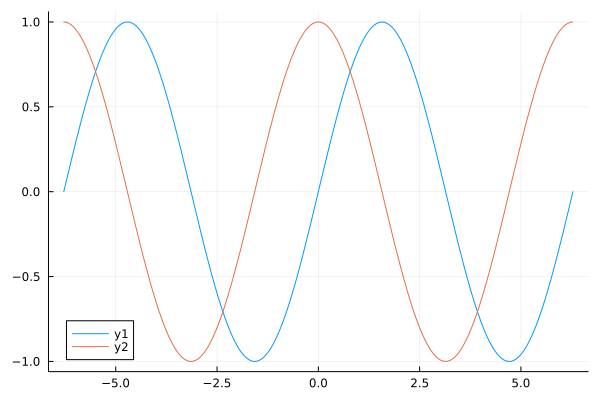

In [163]:
plot([sin, cos], -2pi, 2pi)

In [162]:
using DataFrames
df = DataFrame(c1=1:10, c2=(1:10).^2)

Row,c1,c2
,Int64,Int64
1,1,1
2,2,4
3,3,9
4,4,16
5,5,25
6,6,36
7,7,49
8,8,64
9,9,81


### Package Composability

- One unique feature sof Julia is that most of the language itself, in addition to packages, are written in Julia
- For other languages like Python or R the "built in" part of the language is often written in another language like C
- This difference has a large impact for Julia users
    - Built in code and user code (including packages) are given the same "treatment"
    - Anything the language creators can do, so can you
- A practical implication of this is that packages can operate on built in types (like we saw in our examples above) as well as types from other packages
- Let's see what this looks like by plotting a DataFrame


In [164]:
# install "StatsPlots", which links Plots and DataFrames
Pkg.add("StatsPlots")

using StatsPlots

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


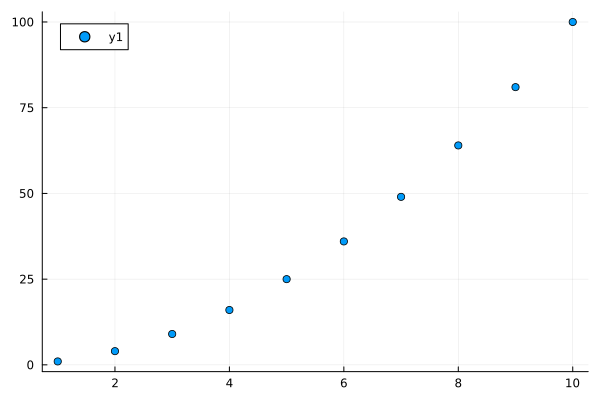

In [165]:
@df df scatter(:c1, :c2)

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


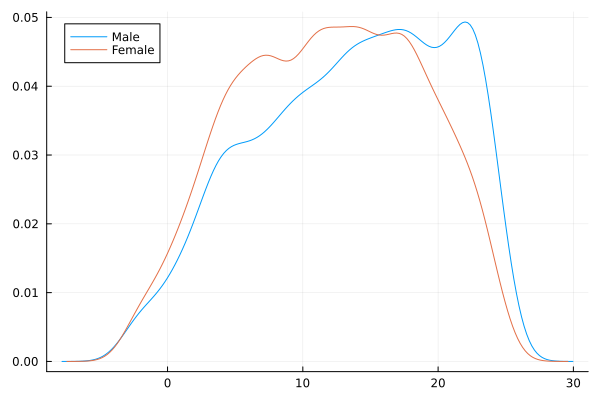

In [167]:
Pkg.add("RDatasets") # common datasets from R programming language
using RDatasets
school = RDatasets.dataset("mlmRev","Hsb82")
@df school density(:MAch, group = :Sx)

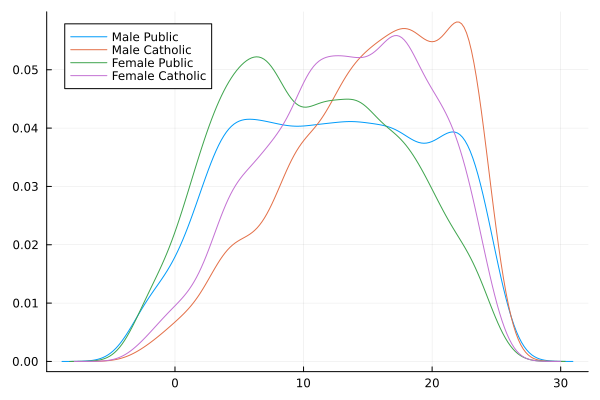

In [168]:
@df school density(:MAch, group = (:Sx, :Sector))